# Partitioning Benchmark

In [3]:
import networkx as nx
import cProfile
import random
import timeit
import matplotlib.pyplot as plt

from original_partitioner import part_graph_extended as original_part
from adjlist_partitioner import part_graph_extended as adjlist_part
# from wrapper.partitioner import part_graph_kway_extended as optim_part

In [4]:
def networkx_to_metis_adjlist(G):    
    n = G.number_of_nodes()
    adjlist = [[] for _ in range(n)]
    
    for u, v in G.edges():
        adjlist[u].append(v)

    return adjlist

def create_random_graph(n, p):
    G = nx.erdos_renyi_graph(n=n, p=p)
    
    return G

def benchmark_orig_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    
    start = timeit.default_timer()
    original_part(G, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

def benchmark_adjlist_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    adjlist = networkx_to_metis_adjlist(G)
    
    start = timeit.default_timer()
    adjlist_part(adjlist, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

def benchmark_optim_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    adjlist = networkx_to_metis_adjlist(G)
    
    start = timeit.default_timer()
    optim_part(adjlist, parts, distance=dist)
    stop = timeit.default_timer()
    
    return stop - start

Profiling

In [3]:
# def profile_run():
#     benchmark_adjlist_one_trial(10000, 0.3, 5, 4)

# cProfile.run('profile_run()', 'adj_part.prof')

In [5]:
sizes = []
orig_time = []
adjlist_time = []
optim_time = []

size = 64

do_time1 = True

while True:
    if do_time1:
        time1 = benchmark_orig_one_trial(size, 0.3, 5, 4)
        orig_time.append(time1)
    
    time2 = benchmark_adjlist_one_trial(size, 0.3, 5, 4)
    time3 = benchmark_optim_one_trial(size, 0.3, 5, 4)
    
    sizes.append(size)
    adjlist_time.append(time2)
    optim_time.append(time3)
    
    print(size, time1, time2, time3)
    
    if time1 > 30:
        do_time1 = False
        
    if time2 > 1:
        break
    
    size *= 2

NameError: name 'optim_part' is not defined

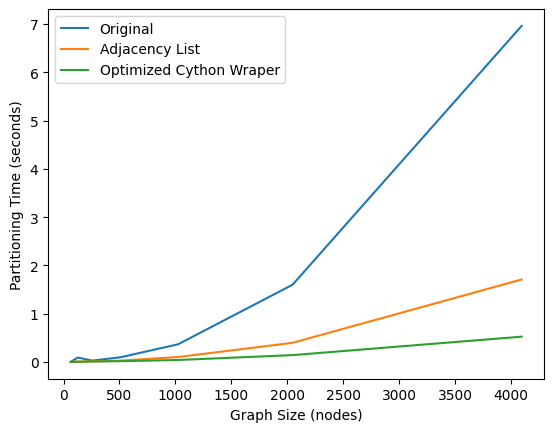

In [8]:
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Partitioning Time (seconds)')

plt.plot(sizes, orig_time, label="Original")
plt.plot(sizes, adjlist_time, label="Adjacency List")
plt.plot(sizes, optim_time, label="Optimized Cython Wraper")

plt.legend()
plt.show()

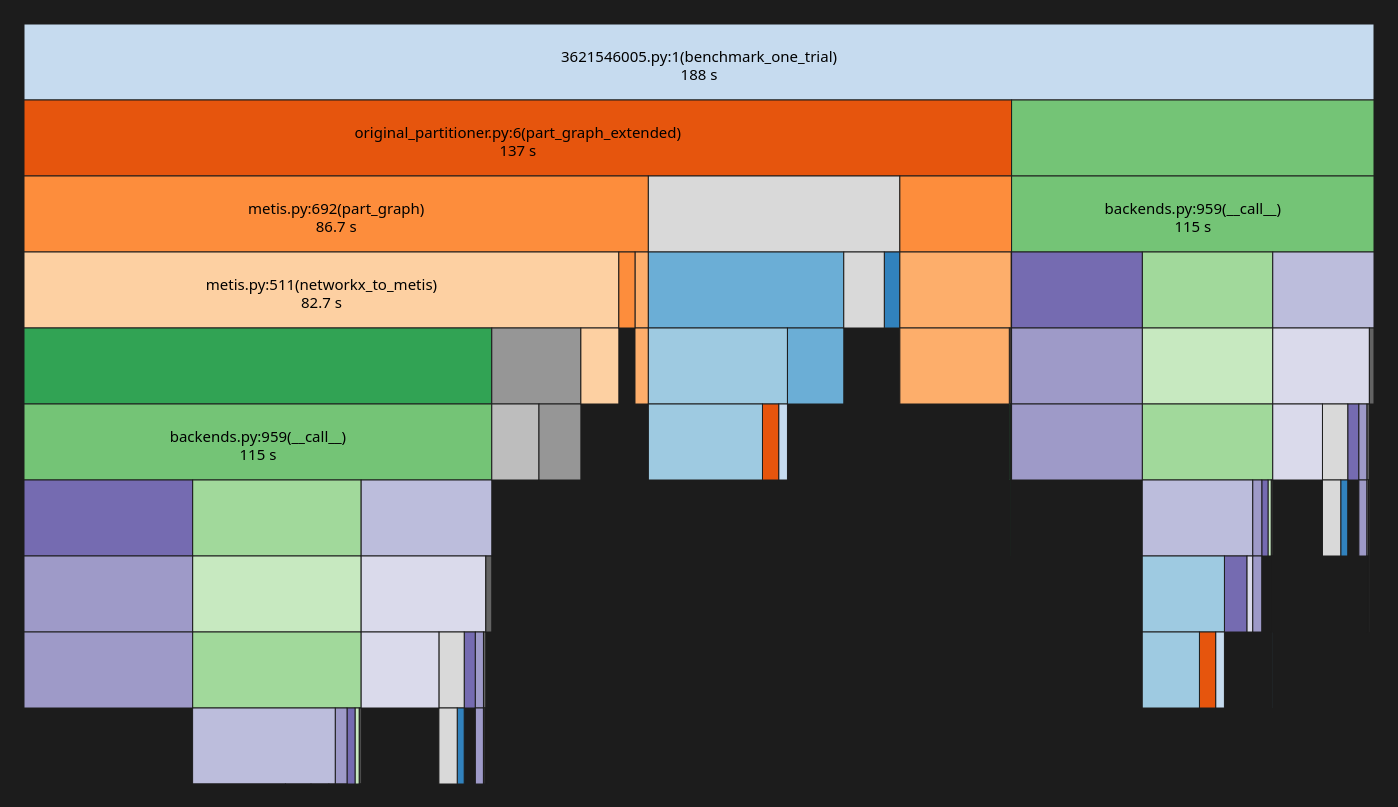